# INSTALL APPROACH 1
## if you want to locally edit files and want to manage when you pull on git 


in your terminal, start 
```
julia
```
in julia running from terminal do
```
]
```
which means go to package manager

Let's make sure you don't have a different install of Laplacians.jl (I don't know if that's needed)
```
remove Laplacians
```
then do 
```
develop LOCATION_OF_INSTALL/Laplacians.jl
```
e.g. for me LOCATION_OF_INSTALL = /Users/rjkyng/Dropbox/Repos

This (I think) will mean the pkg stays up to with local changes in the git repo

# INSTALL APPROACH 2
## if you're not going to change the julia files


in your terminal, start 
```
julia
```
in julia running from terminal do
```
]
```
which means go to package manager

Let's make sure you don't have a different install of Laplacians.jl (I don't know if that's needed)
```
remove Laplacians
```
then do 
```
add Laplacians#perf-test-dev
```

This (I think) will mean the pkg stays up to date via 

# Loading packages

In [12]:
using Revise
using Laplacians
using Pkg
@show Pkg.pathof(Laplacians)
using SparseArrays
using LinearAlgebra

Pkg.pathof(Laplacians) = "/Users/rjkyng/.julia/packages/Laplacians/wtMt9/src/Laplacians.jl"


In [13]:
using PyPlot

# Sanity check with plots of grid

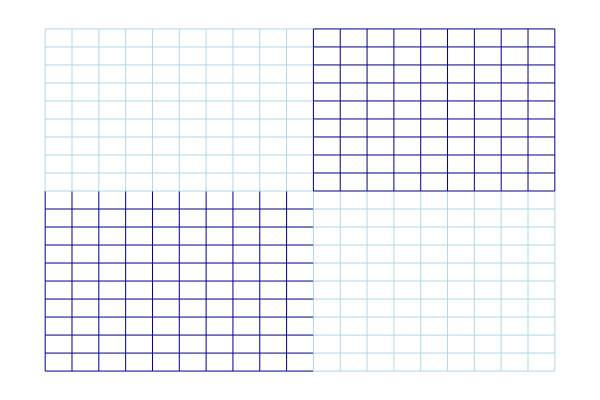

  0.000061 seconds (30 allocations: 95.531 KiB)


In [14]:
s1 = 20
s2 = 20
@time A = ggrid2_checkered(s1,s2,2,2,10.0)
(x,y) = ggrid2coords(s1,s2);
p = plot_graph_weighted(A,x,y;dots=false);

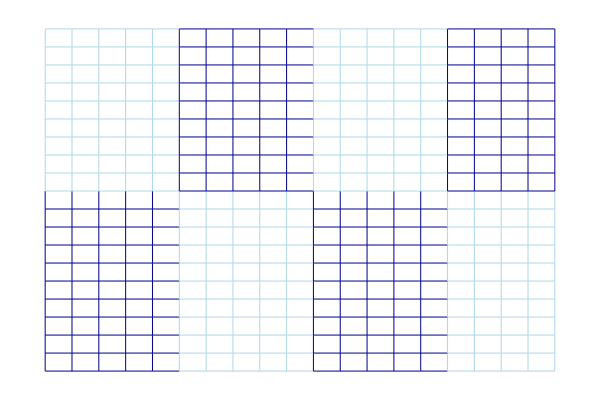

  0.000043 seconds (30 allocations: 95.531 KiB)


In [15]:
s1 = 20
s2 = 20
@time A = ggrid2_checkered(s1,s2,4,2,10.0)
(x,y) = ggrid2coords(s1,s2);
p = plot_graph_weighted(A,x,y;dots=false);

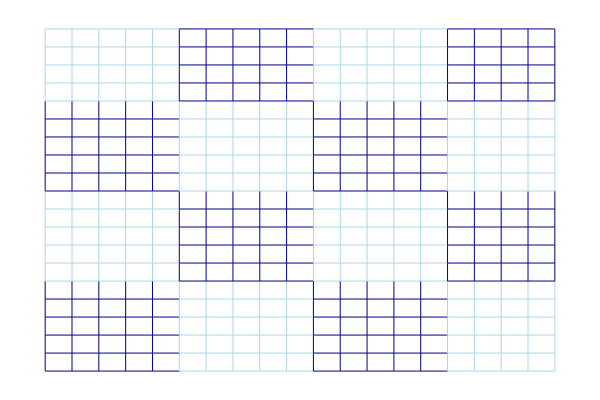

  0.000041 seconds (30 allocations: 95.531 KiB)


In [16]:
s1 = 20
s2 = 20
@time A = ggrid2_checkered(s1,s2,4,4,10.0)
(x,y) = ggrid2coords(s1,s2);
p = plot_graph_weighted(A,x,y;dots=false);

# A problem from SBBRGS12 

See SBBRGS12 [1] p. 10, table IV

Also, for a more prescise description, see p. 12-13 of BCKFH18 [2]

[1] Laplacians.jl/devel/sbbrgs12.pdf

[2] Laplacians.jl/devel/bckfh18.pdf


In [17]:
s1 = 1000
s2 = 2000
n = s1*s2
weight = 1e6
blocks1 = 16
blocks2 = 2
@time A = ggrid2_checkered(s1,s2,blocks1,blocks2,weight) # create the adjacency matrix
@time L = lap(A) # create the Laplacian
bot = 1:s1
top = n-s1+1:n
left = s1+1:s1:n-s1
right = 2*s1:s1:n-1
bndry = [bot; top; left; right]
@time int = setdiff(1:n,bndry) # the interior variables (= all - boundary )

@time M = L[int,int]
# remove the rows and colums corresponding to the boundary of the grid
# -- this is because we essentially want to force boundary voltages to be zero

ni = length(int) #this is the remaining variables

  1.473997 seconds (48 allocations: 472.727 MiB, 54.44% gc time)
  0.617122 seconds (22 allocations: 244.050 MiB, 66.72% gc time)
  0.741915 seconds (31 allocations: 71.122 MiB, 28.20% gc time)
  0.753578 seconds (13 allocations: 182.511 MiB, 35.62% gc time)


1994004

Now solve a linear equation on the interior variables

In [18]:
b = randn(ni);
@time sol = approxchol_sddm(M);
@time x = sol(b,tol=1e-8)
norm(M*x-b)/norm(b)

 13.229100 seconds (11.96 M allocations: 3.033 GiB, 34.57% gc time)
 19.776522 seconds (334 allocations: 2.110 GiB, 7.66% gc time)


1.3161864145450579e-8